In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import openpyxl
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
dataSourceExcel = 'Data for ML.xlsx'

In [3]:
masterDF = pd.read_excel(dataSourceExcel)

In [4]:
masterDF.head()

ID                                              Title  \
0  4905  MiR-509-3 augments the synthetic lethality of ...   
1  4909  The utility of plasma vascular endothelial gro...   
2  4921  Clinical significance of homologous recombinat...   
3  4991  HOXA4/HOXB3 gene expression signature as a bio...   
4  4992  Predicting treatment response using patient de...   

                                            Abstract  \
0  <b> Background </b>: PARP inhibitors have been...   
1  <b> Background </b>: The heparan sulfate mimet...   
2  <b> Background </b>: HRD score is related to c...   
3  <b> Objective </b>s: Aberrant homeobox (HOX) g...   
4  <b> Background </b>: There are limited clinica...   

                                             Authors  \
0  Sun C., Cao W., Qiu C., Li C., Dongol S., Zhan...   
1  Dredge K., Hammond E., Winterhoff B., Giri S.,...   
2  Hansen J.M., Ring K.L., Baggerly K.A., Wu S., ...   
3  Miller K.R., Patel J.N., Zhang Q., Norris E.J....   
4  Sprackling C.M., Kratz J.D., Favreau P.F., Kar...   

                              Journal To Predict: Study type  \
0  Journal of Hematology and Oncology      Animal / In-vitro   
1                     Cancer Research      Animal / In-vitro   
2        Journal of Clinical Oncology      Animal / In-vitro   
3                Gynecologic Oncology      Animal / In-vitro   
4                     Cancer Research      Animal / In-vitro   

  To Predict: Disease Name            To Predict: Intervention  
0           Ovarian cancer                            Olaparib  
1           Ovarian cancer                         Bevacizumab  
2       Endometrial cancer                            Olaparib  
3           Ovarian cancer  Bevacizumab, Chemotherapy, Surgery  
4       Endometrial cancer                      Not applicable

In [5]:
masterDF.drop('ID', axis=1, inplace = True)

In [6]:
masterDF.head()

Title  \
0  MiR-509-3 augments the synthetic lethality of ...   
1  The utility of plasma vascular endothelial gro...   
2  Clinical significance of homologous recombinat...   
3  HOXA4/HOXB3 gene expression signature as a bio...   
4  Predicting treatment response using patient de...   

                                            Abstract  \
0  <b> Background </b>: PARP inhibitors have been...   
1  <b> Background </b>: The heparan sulfate mimet...   
2  <b> Background </b>: HRD score is related to c...   
3  <b> Objective </b>s: Aberrant homeobox (HOX) g...   
4  <b> Background </b>: There are limited clinica...   

                                             Authors  \
0  Sun C., Cao W., Qiu C., Li C., Dongol S., Zhan...   
1  Dredge K., Hammond E., Winterhoff B., Giri S.,...   
2  Hansen J.M., Ring K.L., Baggerly K.A., Wu S., ...   
3  Miller K.R., Patel J.N., Zhang Q., Norris E.J....   
4  Sprackling C.M., Kratz J.D., Favreau P.F., Kar...   

                              Journal To Predict: Study type  \
0  Journal of Hematology and Oncology      Animal / In-vitro   
1                     Cancer Research      Animal / In-vitro   
2        Journal of Clinical Oncology      Animal / In-vitro   
3                Gynecologic Oncology      Animal / In-vitro   
4                     Cancer Research      Animal / In-vitro   

  To Predict: Disease Name            To Predict: Intervention  
0           Ovarian cancer                            Olaparib  
1           Ovarian cancer                         Bevacizumab  
2       Endometrial cancer                            Olaparib  
3           Ovarian cancer  Bevacizumab, Chemotherapy, Surgery  
4       Endometrial cancer                      Not applicable

In [7]:
masterDF.shape

(2333, 7)

In [8]:
#collect all the titles into a string
allTitlesList = masterDF['Title'].values.tolist()

In [9]:
allTitleMasterText = ''.join(allTitlesList)

In [10]:
allTitleMasterText

'MiR-509-3 augments the synthetic lethality of PARPi by regulating HR repair in PDX model of HGSOCThe utility of plasma vascular endothelial growth factor and heparanase as pharmacodynamic markers following treatment with PG545, a heparan sulfate mimetic: Preliminary evidence from preclinical and clinical settingsClinical significance of homologous recombination deficiency (HRD) score testing in endometrial cancer patientsHOXA4/HOXB3 gene expression signature as a biomarker of recurrence in patients with high-grade serous ovarian cancer following primary cytoreductive surgery and first-line adjuvant chemotherapyPredicting treatment response using patient derived organotypic cancer spheroidsBiological Role of Tumor/Stromal CXCR4-CXCL12-CXCR7 in MITO16A/MaNGO-OV2 Advanced Ovarian Cancer PatientsIncidence of tumour BRCA1/2 variants in relapsed, platinum-sensitive ovarian, fallopian tube and primary peritoneal cancerReversing PARP inhibitor resistance by targeting the replication stress re

In [11]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
titleTokens = word_tokenize(allTitleMasterText)

In [14]:
print(len(titleTokens))

39826


In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
tokens_without_sw = [word for word in titleTokens if not word in stopwords.words()]

KeyboardInterrupt: 

In [ ]:
print(len(tokens_without_sw))

In [16]:
#remove additonal tokens
discardTokens = ['(', ')', '[', ']',',',':', '-1', '-2', '-3', '-4', 'a', 'an', 'the', 'A', 'An', 'The', '1', '2', 'Is', 'Are', 'In', '*', '-']

In [17]:
tokens_without_sw_dt = [tok for tok in titleTokens if tok not in discardTokens]

In [18]:
countDict = Counter(tokens_without_sw_dt)

In [19]:
countDict

Counter({'MiR-509-3': 1,
         'augments': 2,
         'synthetic': 3,
         'lethality': 3,
         'of': 1829,
         'PARPi': 33,
         'by': 98,
         'regulating': 2,
         'HR': 1,
         'repair': 53,
         'in': 1719,
         'PDX': 1,
         'model': 11,
         'HGSOCThe': 1,
         'utility': 10,
         'plasma': 1,
         'vascular': 7,
         'endothelial': 6,
         'growth': 8,
         'factor': 11,
         'and': 1146,
         'heparanase': 1,
         'as': 129,
         'pharmacodynamic': 2,
         'markers': 5,
         'following': 21,
         'treatment': 306,
         'with': 948,
         'PG545': 1,
         'heparan': 1,
         'sulfate': 1,
         'mimetic': 1,
         'Preliminary': 4,
         'evidence': 8,
         'from': 137,
         'preclinical': 1,
         'clinical': 112,
         'settingsClinical': 1,
         'significance': 11,
         'homologous': 58,
         'recombination': 59,
         'def

In [20]:
print(len(countDict))

6840


In [21]:
countValues = countDict.values()
countValuesDict = Counter(countValues)
xVals = countValuesDict.keys()
yVals = countValuesDict.values()

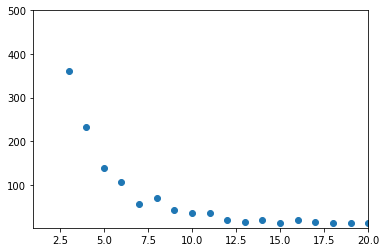

In [22]:
plt.scatter(xVals, yVals)
plt.xlim(1,20)
plt.ylim(1,500)
plt.show()

In [23]:
selectedKeys = list()
for key in countDict:
    if countDict[key]>=10:
        selectedKeys.append(key)
print(len(selectedKeys))

412


In [24]:
titleFeatsList = list()
fi = 1
for key in selectedKeys:
    ftname = 'title-'+str(fi)+'-'+key
    titleFeatsList.append(ftname)
    fi = fi + 1
print(titleFeatsList)

['title-1-of', 'title-2-PARPi', 'title-3-by', 'title-4-repair', 'title-5-in', 'title-6-model', 'title-7-utility', 'title-8-factor', 'title-9-and', 'title-10-as', 'title-11-following', 'title-12-treatment', 'title-13-with', 'title-14-from', 'title-15-clinical', 'title-16-significance', 'title-17-homologous', 'title-18-recombination', 'title-19-deficiency', 'title-20-HRD', 'title-21-score', 'title-22-testing', 'title-23-endometrial', 'title-24-cancer', 'title-25-gene', 'title-26-expression', 'title-27-biomarker', 'title-28-recurrence', 'title-29-patients', 'title-30-high-grade', 'title-31-serous', 'title-32-ovarian', 'title-33-primary', 'title-34-cytoreductive', 'title-35-surgery', 'title-36-first-line', 'title-37-adjuvant', 'title-38-response', 'title-39-using', 'title-40-patient', 'title-41-Advanced', 'title-42-Ovarian', 'title-43-Cancer', 'title-44-BRCA1/2', 'title-45-variants', 'title-46-relapsed', 'title-47-platinum-sensitive', 'title-48-fallopian', 'title-49-tube', 'title-50-perito

In [25]:
#insert the features based on title strings
ft = selectedKeys[1]
ft

'PARPi'

In [26]:
masterDF['Title'].values[0]

'MiR-509-3 augments the synthetic lethality of PARPi by regulating HR repair in PDX model of HGSOC'

In [27]:
allRows = list()
for ri in range(2333):
    titleStr = masterDF['Title'].values[ri]
    ftList = list()
    for selFeat in selectedKeys:
        ftList.append(titleStr.count(selFeat))
    print(ftList)
    allRows.append(ftList)    

[2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[1, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 7, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 5, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
for si in range(len(selectedKeys)):
    selFeat = selectedKeys[si]
    ftName = titleFeatsList[si]
    print('ft= ', selFeat)
    ftVals = [ss[si] for ss in allRows]
    print(len(ftVals))
    masterDF[ftName] = ftVals

ft=  of
2333
ft=  PARPi
2333
ft=  by
2333
ft=  repair
2333
ft=  in
2333
ft=  model
2333
ft=  utility
2333
ft=  factor
2333
ft=  and
2333
ft=  as
2333
ft=  following
2333
ft=  treatment
2333
ft=  with
2333
ft=  from
2333
ft=  clinical
2333
ft=  significance
2333
ft=  homologous
2333
ft=  recombination
2333
ft=  deficiency
2333
ft=  HRD
2333
ft=  score
2333
ft=  testing
2333
ft=  endometrial
2333
ft=  cancer
2333
ft=  gene
2333
ft=  expression
2333
ft=  biomarker
2333
ft=  recurrence
2333
ft=  patients
2333
ft=  high-grade
2333
ft=  serous
2333
ft=  ovarian
2333
ft=  primary
2333
ft=  cytoreductive
2333
ft=  surgery
2333
ft=  first-line
2333
ft=  adjuvant
2333
ft=  response
2333
ft=  using
2333
ft=  patient
2333
ft=  Advanced
2333
ft=  Ovarian
2333
ft=  Cancer
2333
ft=  BRCA1/2
2333
ft=  variants
2333
ft=  relapsed
2333
ft=  platinum-sensitive
2333
ft=  fallopian
2333
ft=  tube
2333
ft=  peritoneal
2333
ft=  PARP
2333
ft=  inhibitor
2333
ft=  resistance
2333
ft=  associated
2333
ft=  com

C:\Users\HP\AppData\Local\Temp/ipykernel_23272/1500000501.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  masterDF[ftName] = ftVals


ft=  burden
2333
ft=  systemic
2333
ft=  paclitaxel
2333
ft=  BRCA
2333
ft=  BRCA2
2333
ft=  TO
2333
ft=  THE
2333
ft=  CHEMOTHERAPY
2333
ft=  IN
2333
ft=  OVARIAN
2333
ft=  CANCER
2333
ft=  OF
2333
ft=  Testing
2333
ft=  ?
2333
ft=  MAINTENANCE
2333
ft=  THERAPY
2333
ft=  PATIENTS
2333
ft=  WITH
2333
ft=  Primary
2333
ft=  DNA
2333
ft=  High-Grade
2333
ft=  Serous
2333
ft=  Carcinoma
2333
ft=  ;
2333
ft=  FOR
2333
ft=  AND
2333
ft=  AFTER
2333
ft=  ADVANCED
2333
ft=  efficacy
2333
ft=  are
2333
ft=  Olaparib
2333
ft=  screening
2333
ft=  potential
2333
ft=  somatic
2333
ft=  sequencing
2333
ft=  status
2333
ft=  targeted
2333
ft=  panel
2333
ft=  Chinese
2333
ft=  resistant
2333
ft=  breast
2333
ft=  ADP-ribose
2333
ft=  Inhibitor
2333
ft=  combined
2333
ft=  between
2333
ft=  BRCA1
2333
ft=  is
2333
ft=  mutated
2333
ft=  –
2333
ft=  secondary
2333
ft=  mutation
2333
ft=  effects
2333
ft=  predict
2333
ft=  ’
2333
ft=  phase
2333
ft=  standard
2333
ft=  network
2333
ft=  metastatic
2

In [29]:
masterDF.head()

Title  \
0  MiR-509-3 augments the synthetic lethality of ...   
1  The utility of plasma vascular endothelial gro...   
2  Clinical significance of homologous recombinat...   
3  HOXA4/HOXB3 gene expression signature as a bio...   
4  Predicting treatment response using patient de...   

                                            Abstract  \
0  <b> Background </b>: PARP inhibitors have been...   
1  <b> Background </b>: The heparan sulfate mimet...   
2  <b> Background </b>: HRD score is related to c...   
3  <b> Objective </b>s: Aberrant homeobox (HOX) g...   
4  <b> Background </b>: There are limited clinica...   

                                             Authors  \
0  Sun C., Cao W., Qiu C., Li C., Dongol S., Zhan...   
1  Dredge K., Hammond E., Winterhoff B., Giri S.,...   
2  Hansen J.M., Ring K.L., Baggerly K.A., Wu S., ...   
3  Miller K.R., Patel J.N., Zhang Q., Norris E.J....   
4  Sprackling C.M., Kratz J.D., Favreau P.F., Kar...   

                              Journal To Predict: Study type  \
0  Journal of Hematology and Oncology      Animal / In-vitro   
1                     Cancer Research      Animal / In-vitro   
2        Journal of Clinical Oncology      Animal / In-vitro   
3                Gynecologic Oncology      Animal / In-vitro   
4                     Cancer Research      Animal / In-vitro   

  To Predict: Disease Name            To Predict: Intervention  title-1-of  \
0           Ovarian cancer                            Olaparib           2   
1           Ovarian cancer                         Bevacizumab           1   
2       Endometrial cancer                            Olaparib           1   
3           Ovarian cancer  Bevacizumab, Chemotherapy, Surgery           1   
4       Endometrial cancer                      Not applicable           0   

   title-2-PARPi  title-3-by  ...  title-403-RECURRENT  \
0              1           1  ...                    0   
1              0           0  ...                    0   
2              0           0  ...                    0   
3              0           0  ...                    0   
4              0           0  ...                    0   

   title-404-recommendations  title-405-open-label  title-406-GARNET  \
0                          0                     0                 0   
1                          0                     0                 0   
2                          0                     0                 0   
3                          0                     0                 0   
4                          0                     0                 0   

   title-407-EC  title-408-advanced/recurrent  title-409-PHASE  \
0             0                             0                0   
1             0                             0                0   
2             0                             0                0   
3             0                             0                0   
4             0                             0                0   

   title-410-meta-analysis  title-411-systematic  title-412-placebo  
0                        0                     0                  0  
1                        0                     0                  0  
2                        0                     0                  0  
3                        0                     0                  0  
4                        0                     0                  0  

[5 rows x 419 columns]

In [30]:
newMasterDF = pd.DataFrame(masterDF[titleFeatsList])

In [31]:
newMasterDF.shape

(2333, 412)

In [32]:
newMasterDF['Label'] = masterDF['To Predict: Disease Name']

In [33]:
newMasterDF.shape

(2333, 413)

# ready to apply basic ML


In [34]:
train=newMasterDF.sample(frac=0.8,random_state=200)
test=newMasterDF.drop(train.index)

In [35]:
xTrain = train[titleFeatsList]
ytrain = train['Label']

In [36]:
clf = DecisionTreeClassifier(max_depth =13, random_state = 42)

clf.fit(xTrain, ytrain)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [37]:
xTest = test[titleFeatsList]
ytest = test['Label']

In [38]:
pred_dtree = clf.predict(xTest)

In [51]:
from sklearn.metrics import confusion_matrix
print("Accuracy:",metrics.accuracy_score(ytest, pred_dtree))

conf_matrix = confusion_matrix(ytest, pred_dtree)
print("Confusion Matrix:")
print(conf_matrix)

num_unique_classes = masterDF['To Predict: Disease Name'].nunique()
print("Number of Unique Classes:", num_unique_classes)


print(masterDF.groupby('To Predict: Disease Name').size())

import pandas as pd

unique_counts = ytrain.value_counts()
print("Count of each unique value in 'To Predict: Disease Name' column:")
print(unique_counts)

unique_counts = ytest.value_counts()
print("Count of each unique value in 'To Predict: Disease Name' column:")
print(unique_counts)


Accuracy: 0.9528907922912205
Confusion Matrix:
[[ 56  16]
 [  6 389]]
Number of Unique Classes: 2
To Predict: Disease Name
Endometrial cancer     390
Ovarian cancer        1943
dtype: int64
Count of each unique value in 'To Predict: Disease Name' column:
Ovarian cancer        1548
Endometrial cancer     318
Name: Label, dtype: int64
Count of each unique value in 'To Predict: Disease Name' column:
Ovarian cancer        395
Endometrial cancer     72
Name: Label, dtype: int64


In [52]:
#display of results

sampleDF = masterDF.sample(n=10)

In [53]:
sampleDF.shape

(10, 419)

In [54]:
predictedList = list()
for ri in range(2333):
    row = masterDF.iloc[ri][titleFeatsList]
    pred = clf.predict([row])
    print(pred)
    predictedList.append(pred)

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha


['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian can

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha


['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovari

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian ca

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ova

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endom

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha


['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha


['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Endometrial cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Ovarian cancer']
['Endometrial cancer']
['Endometrial cancer']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

In [72]:
predictedList

[array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Endometrial cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Endometrial cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Endometrial cancer'], dtype=object),
 array(['Endometrial cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian cancer'], dtype=object),
 array(['Ovarian c

In [73]:
masterDF['PredictedDisease'] = predictedList

In [48]:
reportFname = '../PredictedDisease.xlsx'
masterDF.to_excel(reportFname)

In [49]:
import pickle

In [51]:
# save the model to disk
filename = '../InnomagineTitleRFTrainedClassifierDump.sav'
pickle.dump(clf, open(filename, 'wb'))
 

In [53]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xTest, ytest)
print(result)

0.9528907922912205


In [55]:
newMasterDF['Label'] = masterDF['To Predict: Study type']

In [56]:
newMasterDF.shape

(2333, 413)

In [57]:
train=newMasterDF.sample(frac=0.8,random_state=200)
test=newMasterDF.drop(train.index)

In [58]:
xTrain = train[titleFeatsList]
ytrain = train['Label']

In [59]:
clf = DecisionTreeClassifier(max_depth =13, random_state = 42)
clf.fit(xTrain, ytrain)

DecisionTreeClassifier(max_depth=13, random_state=42)

In [60]:
xTest = test[titleFeatsList]
ytest = test['Label']

In [61]:
pred_dtree = clf.predict(xTest)

In [63]:
print("Accuracy:",metrics.accuracy_score(ytest, pred_dtree))

conf_matrix = confusion_matrix(ytest, pred_dtree)
print("Confusion Matrix:")
print(conf_matrix)

num_unique_classes = masterDF['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)


print(masterDF.groupby('To Predict: Study type').size())

unique_counts = ytrain.value_counts()
print("Count of each unique Training value in 'To Predict: Disease Name' column:")
print(unique_counts)

unique_counts = ytest.value_counts()
print("Count of each unique Testing value in 'To Predict: Disease Name' column:")
print(unique_counts)


Accuracy: 0.32762312633832974
Confusion Matrix:
[[ 5  2  0  0  0  0  1  0  0  0 24  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0 13  1  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  1  0  7  0  0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  3  0 38  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  1  0  0  8  0  1  0 17  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0 18  0  2  2  0]
 [ 0  0  0  0  0  0  0  0  0 14 12  0  0  1  0]
 [ 1  2  0  2  0  0  2  0  0  0 71  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 38  1  1  0  1]
 [ 0  0  0  0  0  0  1  0  3  0  5  0  5  1  0]
 [ 0  0  0  0  0  0  0  0  1  0 40  0  0  1  0]
 [ 0  0  0  1  0  0  1  0  0  1  5  0  0  0  3]]
Number of Unique Classes: 15
To Predict: Study type
Animal / In-vitro                     200
Case report / series                  181
Case-control study                     41
Cohort study                          191
Comment, Le

In [82]:
#display of results

sampleDF = masterDF.sample(n=10)

In [83]:
sampleDF.shape

(10, 420)

In [84]:
predictedList = list()
for ri in range(2333):
    row = masterDF.iloc[ri][titleFeatsList]
    pred = clf.predict([row])
    print(pred)
    predictedList.append(pred)

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Economic study']
['Animal / In-vitro']
['Observational study']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal 

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Animal / In-vitro']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observation

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Case report / seri

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Other']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Observational study']
['Case report / series']
['Case re

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Observational study']
['Case report / series']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha


['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Case report / series']
['Case report / series']
['Case report / series']
['Observational study']
['Case-control study']
['Case-control study']
['Case-control study']
['Observational study']
['Case-control study']
['Case-control study']
['Observational study']
['Case-control study']
['Case-control study']
['Case-control study']
['Case-control study']
['Observational study']
['Observational study']
['Case-control study']
['Case-control study']
['Observational study']
['Observational study']
['Observational study']
['Case-control study']
['Observational study']
['Case-control study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case-control study']
['Case-control study']
['Observational study']
['Observational study']
['Observational study']
['Case-control study']
['Observational study']
['Cohort study']
['Cohort study']
['Cohort study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Cohort study']
['Cohort study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Systematic review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Case report / series']
['Cohort study']
['Observational study']
['Cohort study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Cohort study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Other']
['Comment, Letter to editor, Erratum']
['Interventional study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Ob

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Comment, Letter to editor, Erratum']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Comment, Letter to editor, Erratum']
['Comment, Letter to editor, Erratum']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Comment, Letter to editor, Erratum']
['Observational study']
['Comment, Letter to editor, Erratum']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cross-sectional study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observ

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cross-sectional study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational stu

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Economic study']
['Randomized controlled trial']
['Economic study']
['Observational study']
['Observational study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Observational study']
['Economic study']
['Economic study']
['Observation

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Cohort study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Observational study']
['Economic study']
['Observational study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Observational study']
['Observational stu

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Observational study']
['Observational study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Economic study']
['Systematic review']
['Economic study']
['Economic study']
['Observational study']
['Observational study']
['Economic study']
['Economic study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Guideline']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
[

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observati

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Interventional study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Interventional study']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Obser

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha


['Interventional study']
['Cohort study']
['Interventional study']
['Review']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Review']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Interventional study']
['Interventional study']
['Observati

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Interventional study']
['Interventional study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Interventional study']
['Observational study']
['Interventional study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Interventional study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Systematic review']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Observational study']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Systematic review']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Observationa

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Systematic review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Observational study']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Review']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Meta-analysis']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case-control study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Cohort study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Case report / series']
['Observational study']
['Case report / series']
['Observational study']
['Observational study']
['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational 

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Case report / series']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observati

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Other']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Other']
['Observational study']
['Observational study']
['Other']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Other']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Economic study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Other']
['Observational study']
['Observational study']
['Systematic review']
['Observational study']
['Observation

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Other']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Other']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational stud

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Interventional study']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Randomized controlled trial']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Interventional study']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Review']
['Randomized controlled trial']
['Observational study']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Randomized

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Randomized controlled trial']
['Observational study']
['Randomized controlled trial']
['Observational study']
['Randomized controlled trial']
['Randomized controlled trial']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Obs

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational 

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Animal / In-vitro']
['Observational study']
['Review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study'

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Review']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Observational study']
['Systematic review']
['Cohort study']
['Observational study']
['Observational study']
['Meta-analysis']
['Observational study']
['Systematic review']
['Observational study']
['Observational study']
['Systematic review']
['Systematic review']
['

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

In [85]:
predictedList

[array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Animal / In-vitro'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Animal / In-vitro'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Animal / In-vitro'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Animal / In-vitro'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Observational study'], dtype=object),
 array(['Animal / In-vitro'], dtype=object),
 array(['Observational 

In [86]:
masterDF['PredictedStudy'] = predictedList

In [70]:
reportFname = '../PredictedStudy.xlsx'
masterDF.to_excel(reportFname)

In [71]:
import pickle
# save the model to disk
filename = '../InnomagineTitleRFTrainedClassifierDump.sav'
pickle.dump(clf, open(filename, 'wb'))
 

In [72]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xTest, ytest)
print(result)

0.32762312633832974


In [67]:
import numpy as np
newMasterDF['Label'] = masterDF['To Predict: Intervention']
newMasterDF.shape
train=newMasterDF.sample(frac=0.8,random_state=200)
test=newMasterDF.drop(train.index)
xTrain = train[titleFeatsList]
ytrain = train['Label']
clf = DecisionTreeClassifier(max_depth =13, random_state = 42)
clf.fit(xTrain, ytrain)
xTest = test[titleFeatsList]
ytest = test['Label']
pred_dtree = clf.predict(xTest)
print("Accuracy:",metrics.accuracy_score(ytest, pred_dtree))
#display of results

conf_matrix = confusion_matrix(ytest, pred_dtree)
print("Confusion Matrix:")
dimensions = np.shape(conf_matrix)
rows, columns = dimensions


for i in range(rows):
    print(conf_matrix[i])

num_unique_classes = masterDF['To Predict: Intervention'].nunique()
print("Number of Unique Classes:", num_unique_classes)



print(masterDF.groupby('To Predict: Intervention').size())

unique_counts = ytrain.value_counts()
print("Count of each unique Training value in 'To Predict: Disease Name' column:")
print(unique_counts)

unique_counts = ytest.value_counts()
print("Count of each unique Testing value in 'To Predict: Disease Name' column:")
print(unique_counts)


sampleDF = masterDF.sample(n=10)
sampleDF.shape
predictedList = list()
for ri in range(2333):
    row = masterDF.iloc[ri][titleFeatsList]
    pred = clf.predict([row])
    print(pred)
    predictedList.append(pred)
predictedList
len(predictedList)
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xTest, ytest)
print(result)

Accuracy: 0.4068522483940043
Confusion Matrix:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0 26  1  0  1  0  5  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  

Name: Label, Length: 309, dtype: int64
Count of each unique Testing value in 'To Predict: Disease Name' column:
Not applicable                                                        81
PARP inhibitor(s)                                                     63
Olaparib                                                              44
Bevacizumab                                                           44
Niraparib                                                             19
                                                                      ..
Olaparib, Niraparib, Nivolumab, Ipilimumab, Ibritunib, Osimertinib     1
Bevacizumab, Olaparib, Paclitaxel, Carboplatin                         1
Olaparib, Gemcitabine                                                  1
Cyclophosphamide                                                       1
Carboplatin, Stenoparib, Eribulin                                      1
Name: Label, Length: 118, dtype: int64
['PARP inhibitor(s)']
['Not applicable']
['Not

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['Niraparib, Metformin']
['Not applicable']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Olaparib, Niraparib']
['Not applicable']
['Not applicable']
['Niraparib']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib, Niraparib']
['Niraparib']
['PARP inhibitor(s), Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Chemotherapy']
['Niraparib']
['Olaparib']
['Olaparib']
['Not applicable']
['AZD9574']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib']
['Olaparib, Adavosertib']
['PARP inhibitor(s)']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Olaparib']
['Not applicable']
['Olaparib, Entinostat']
['PARP inhibitor(s)']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab, Paclitaxel']
['Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Rucaparib']
['Olaparib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Olaparib']
['Not applicable']
['Not applicable']
['Olaparib']
['Olaparib, Paclitaxel, Carboplatin, Doxorubicin, Cyclophosphamide']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Bevacizumab']
['Olaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib, Neratinib']
['Olaparib, AZD5153']
['PARP inhibitor(s)']
['Olaparib, AZD5153']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s), Chemotherapy']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Olaparib']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['PARP inhibitor(s), Olaparib, Buparlisib']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib']
['Niraparib']
['Not applicable']
['Rucaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Talazoparib, Ganetespib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s), Olaparib, Chemotherapy']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Olaparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Cisplatin, Gemcitabine, Sorafenib']
['Not applicable']
['Not applicable']
['Niraparib']
['Bevacizumab, Paclitaxel']
['Olaparib']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Bevacizumab, Valproate']
['Not applicable']
['Bevacizumab']
['Olaparib']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Dostarlimab']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']
['Chemotherapy']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Paclitaxel']
['Bevacizumab, Chemotherapy']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['PARP inhibitor(s)']
['Olaparib, Chemotherapy']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy, Metformin']
['Chemotherapy']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Pembrolizumab']
['Bevacizumab, Chemotherapy']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Not applicable']
['Olaparib']
['Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['Not applicable']
['Olaparib']
['Chemotherapy']
['Not applicable']
['Olaparib']
['Not applicable']
['Olaparib']
['Not applicable']
['Chemotherapy']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Bevacizumab, Olaparib']
['Not applicable']
['Olaparib']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Chemotherapy']
['Olaparib, Chemotherapy']
['Olaparib']
['Niraparib']
['Olaparib']
['Not applicable']
['Pembrolizumab']
['Pembrolizumab']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Chemotherapy']
['Bevacizumab']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Bevacizumab']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Olaparib']
['Olaparib, Pembrolizumab, Doxorubicin']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Pembrolizumab']
['Not applicable']
['Niraparib']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Bevacizumab, Olaparib']
['Not applicable']
['Olaparib']
['Olaparib']
['Olaparib, Chemotherapy']
['Not applicable']
['Olaparib']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Bevacizumab']
['Not applicable']
['Bevacizumab, Paclitaxel']
['Bevacizumab']
['Bevacizumab']
['Olaparib']
['Not applicable']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Bevacizumab']
['Chemotherapy']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Chemotherapy, Surgery']
['Chemotherapy']
['Olaparib']
['Chemotherapy']
['Olaparib']
['Bevacizumab, Chemotherapy']
['Bevacizumab']
['Not applicable']
['PARP inhibitor(s), Chemotherapy']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s), Doxorubicin, Trabectedin']
['AZD9574']
['Olaparib']
['PARP inhibitor(s), Chemotherapy']
['PARP inhibitor(s), Trabectedin']
['Not applicable']
['Chemotherapy']
['Bevacizumab, Chemotherapy']
['Chemotherapy']
['Bevacizumab']
['Olaparib, Niraparib, Rucaparib']
['Bevacizumab']
['Olaparib']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab']
['Niraparib']
['Bevacizumab']
['Olaparib']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Chemotherapy']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Chemotherapy']
['Chemotherapy, Surgery']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab, Chemotherapy']
['Chemotherapy']
['Bevacizumab']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab']
['Bevacizumab']
['Olaparib']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Chemotherapy']
['Bevacizumab']
['Bevacizumab']
['Olaparib']
['Not applicable']
['Olaparib']
['Olaparib']
['Chemotherapy, Surgery']
['Chemotherapy']
['Bevacizumab, Cyclophosphamide']
['Bevacizumab, Olaparib, Carboplatin']
['Bevacizumab, Paclitaxel, Carboplatin']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab, Paclitaxel, Carboplatin']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Chemotherapy']
['Chemotherapy']
['Not applicable']
['Chemotherapy']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Chemotherapy']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Chemotherapy']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Chemotherapy, Surgery']
['Chemotherapy']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Chemotherapy']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Bevacizumab, Chemotherapy']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Chemotherapy']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Carboplatin, Cisplatin']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Niraparib']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Olaparib']
['Olaparib']
['AZD9574']
['Chemotherapy']
['Olaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Bevacizumab, Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Chemotherapy, Surgery']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Paclitaxel, Doxorubicin, Topotecan']
['Chemotherapy']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Chemotherapy, Surgery']
['Pembrolizumab']
['Pembrolizumab, Lenvatinib']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Pembrolizumab']
['Not applicable']
['Bevacizumab']
['Olaparib']
['Not applicable']
['Chemotherapy, Surgery']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Chemotherapy']
['Not applicable']
['Bevacizumab']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Chemotherapy, Surgery']
['Bevacizumab, Paclitaxel, Doxorubicin, Topotecan']
['Olaparib']
['Olaparib']
['Niraparib']
['Bevacizumab']
['Not applicable']
['Olaparib']
['Olaparib']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Rucaparib']
['Bevacizumab, Olaparib']
['Bevacizumab']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Olaparib']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Niraparib']
['Niraparib']
['Bevacizumab']
['Olaparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Olaparib, Niraparib, Rucaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Dostarlimab']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']
['Niraparib']
['Niraparib']
['Olaparib, Niraparib, Rucaparib']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['PARP inhibitor(s)']
['Niraparib']
['Not applicable']
['Chemotherapy, Surgery']
['PARP inhibitor(s)']
['Niraparib, Pembrolizumab']
['Niraparib, Pembrolizumab']
['Chemotherapy']
['Niraparib']
['Niraparib']
['Niraparib, Pembrolizumab']
['Niraparib']
['Niraparib']
['Olaparib, Niraparib']
['Chemotherapy, Surgery']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Rucaparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Niraparib']
['PARP inhibitor(s)']
['Olaparib']
['Bevacizumab, Olaparib']
['PARP inhibitor(s)']
['Olaparib']
['Olaparib, Niraparib, Rucaparib']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab']
['PARP inhibitor(s)']
['Olaparib']
['Bevacizumab, Cyclophosphamide']
['Bevacizumab, Carboplatin']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab, Carboplatin, Gemcitabine']
['Bevacizumab']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['Olaparib']
['Bevacizumab']
['Bevacizumab, Olaparib']
['Olaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Bevacizumab, Chemotherapy']
['Olaparib']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Pembrolizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Olaparib']
['Olaparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Olaparib']
['Olaparib']
['Olaparib']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Olaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Chemotherapy']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Niraparib']
['Niraparib, Pembrolizumab']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Chemotherapy']
['Niraparib']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Niraparib']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Olaparib']
['Not applicable']
['Niraparib']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Olaparib']
['Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Olaparib']
['Bevacizumab, Chemotherapy']
['Olaparib, Niraparib, Placebo']
['Olaparib, Niraparib, Rucaparib']
['Bevacizumab, Olaparib']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Olaparib']
['Not applicable']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Niraparib']
['Bevacizumab']
['Niraparib']
['PARP inhibitor(s), Chemotherapy']
['Bevacizumab']
['Bevacizumab, Olaparib']
['Bevacizumab, Olaparib, Niraparib, Paclitaxel, Pembrolizumab, Rucaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Bevacizumab']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Chemotherapy']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Chemotherapy']
['Not applicable']
['Not applicable']
['Pembrolizumab']
['Bevacizumab']
['Not applicable']
['Chemotherapy, Surgery']
['Bevacizumab, Paclitaxel']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Olaparib']
['Olaparib, Niraparib']
['Olaparib']
['PARP inhibitor(s)']
['Bevacizumab']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Olaparib, Niraparib, Rucaparib']
['Bevacizumab']
['Not applicable']
['Olaparib, Niraparib']
['Not applicable']
['Niraparib']
['Olaparib, Niraparib, Placebo']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Placebo']
['Olaparib, Niraparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab, Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['Olaparib, Niraparib, Rucaparib']
['Niraparib']
['Niraparib']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Olaparib, Niraparib, Rucaparib']
['Olaparib']
['Bevacizumab, Olaparib']
['Bevacizumab, Olaparib, Chemotherapy']
['Not applicable']
['Olaparib']
['Dostarlimab']
['Not applicable']
['Olaparib, Niraparib']
['Niraparib']
['Niraparib']
['PARP inhibitor(s), Niraparib']
['PARP inhibitor(s)']
['Niraparib']
['Not applicable']
['Olaparib']
['Olaparib']
['Olaparib, Niraparib, Fuzuloparib']
['Olaparib']
['Bevacizumab']
['Bevacizumab']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab, Carboplatin, Gemcitabine']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab, Paclitaxel, Carboplatin']
['Bevacizumab, Paclitaxel, Carboplatin']
['Olaparib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab, Paclitaxel, Doxorubicin, Topotecan']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Paclitaxel, Pembrolizumab, Carboplatin, Lenvatinib']
['Not applicable']
['Chemotherapy, Pembrolizumab, Lenvatinib']
['Pembrolizumab']
['Chemotherapy, Surgery']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Olaparib']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Niraparib']
['Bevacizumab, Olaparib, Niraparib']
['Bevacizumab']
['Pembrolizumab']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['PARP inhibitor(s)']
['Olaparib']
['Bevacizumab, Paclitaxel']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Bevacizumab, Gemcitabine, Oxaliplatin']
['Bevacizumab']
['Carboplatin, Rucaparib, Cisplatin, Nivolumab']
['Bevacizumab, Everolimus, Panitumumab']
['Not applicable']
['Olaparib']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Bevacizumab, Atezolizumab']
['Not applicable']
['Olaparib, Paclitaxel, Carboplatin']
['Pembrolizumab, Lenvatinib']
['Olaparib, Cyclophosphamide']
['Not applicable']
['Bevacizumab, Olaparib, Durvalumab']
['Bevacizumab, Atezolizumab']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Carboplatin, Gemcitabine, Veliparib']
['Chemotherapy']
['Olaparib']
['Not applicable']
['Not applicable']
['Olaparib, Pembrolizumab']
['Bevacizumab, Carboplatin, Doxorubicin, Mirvetuximab']
['Bevacizumab, Irinotecan']
['Niraparib']
['Bevacizumab']
['Olaparib']
['Olaparib, Capivasertib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Talazoparib']
['Olaparib']
['Olaparib']
['Not applicable']
['Not applicable']
['Niraparib']
['Olaparib, Capivasertib']
['Olaparib, Prexasertib']
['Not applicable']
['Olaparib']
['Niraparib, Temozolomide']
['Bevacizumab, Carboplatin, Mirvetuximab']
['Olaparib, Durvalumab']
['Bevacizumab, Olaparib, Durvalumab']
['Olaparib, Doxorubicin']
['Olaparib, Ceralasertib']
['Bevacizumab, Olaparib, Durvalumab']
['Not applicable']
['PARP inhibitor(s), Tazemetostat']
['Olaparib, Capivasertib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Niraparib, Temozolomide']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Niraparib, Temozolomide']
['PARP inhibitor(s)']
['Bevacizumab, Everolimus, Panitumumab']
['Bevacizumab, Everolimus, Panitumumab']
['Not applicable']
['Not applicable']
['Paclitaxel']
['Niraparib']
['Olaparib, Durvalumab, Cediranib']
['Olaparib, Durvalumab']
['Olaparib, Capivasertib']
['Rucaparib']
['Niraparib, Pembrolizumab']
['Rucaparib']
['Olaparib, Paclitaxel, Carboplatin']
['Olaparib, Durvalumab, Cediranib']
['Not applicable']
['Bevacizumab']
['Bevacizumab, Paclitaxel, Carboplatin, Cisplatin']
['Bevacizumab']
['Bevacizumab, Paclitaxel, Carboplatin']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Chemotherapy, Surgery']
['Bevacizumab, Oxaliplatin, Eribulin']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab, Paclitaxel']
['Chemotherapy, Surgery']
['Bevacizumab, Paclitaxel, Carboplatin']
['Not applicable']
['Bevacizumab, Nivolumab']
['Bevacizumab, Carboplatin, Mirvetuximab']
['Bevacizumab, Nivolumab']
['Bevacizumab, Chemotherapy, Gemcitabine']
['Bevacizumab, Paclitaxel']
['Bevacizumab']
['Bevacizumab, Atezolizumab']
['Not applicable']
['Chemotherapy, Niraparib']
['Bevacizumab, CRLX101']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Bevacizumab, Nivolumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Sintilimab']
['Olaparib']
['Olaparib']
['Olaparib, Paclitaxel, Carboplatin']
['Not applicable']
['Not applicable']
['Rucaparib']
['Olaparib, Vistusertib']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Not applicable']
['Dostarlimab']
['Not applicable']
['Dostarlimab']
['Not applicable']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Niraparib, Pembrolizumab']
['Niraparib, Anlotinib']
['Bevacizumab, PARP inhibitor(s), Niraparib']
['PARP inhibitor(s)']
['Chemotherapy']
['PARP inhibitor(s)']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Niraparib, Anlotinib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']
['Olaparib, Niraparib, Rucaparib']
['Olaparib']
['Olaparib']
['AZD9574']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Dostarlimab']
['Olaparib']
['AZD9574']
['Radiation therapy']
['PARP inhibitor(s)']
['Not applicable']
['Prexasertib']
['Olaparib']
['Olaparib']
['Olaparib']
['Not applicable']
['Bevacizumab, Olaparib, Pembrolizumab']
['Olaparib']
['Not applicable']
['Olaparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab, Chemotherapy']
['Chemotherapy, Surgery']
['Chemotherapy']
['Olaparib, Tremelimumab']
['Chemotherapy, Surgery']
['Olaparib']
['Pembrolizumab, Carboplatin, Doxorubicin, Gemcitabine']
['Not applicable']
['Not applicable']
['Olaparib']
['Chemotherapy, Surgery']
['Bevacizumab, Pembrolizumab, Carboplatin, Doxorubicin, Mirvetuximab']
['Dostarlimab']
['Bevacizumab, Olaparib, Chemotherapy, Niraparib, Rucaparib, Veliparib']
['PARP inhibitor(s)']
['Olaparib']
['Bevacizumab, Olaparib']
['PARP inhibitor(s), Tazemetostat']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Rucaparib']
['Bevacizumab, Olaparib']
['Bevacizumab']
['Bevacizumab, Olaparib, Niraparib, Rucaparib, Veliparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab']
['Bevacizumab, Chemotherapy']
['PARP inhibitor(s)']
['Bevacizumab']
['Olaparib, Niraparib, Rucaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Chemotherapy, Surgery']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Bevacizumab, Olaparib, Niraparib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab, PARP inhibitor(s)']
['Bevacizumab, PARP inhibitor(s)']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib']
['Not applicable']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Bevacizumab, Olaparib']
['Not applicable']
['Niraparib']
['Not applicable']
['Not applicable']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['PARP inhibitor(s)']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Rucaparib']
['PARP inhibitor(s)']
['Bevacizumab, Olaparib, Niraparib, Placebo, Veliparib, Nintedanib, Pazopanib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Fuzuloparib']
['Bevacizumab, Olaparib, Niraparib']
['PARP inhibitor(s)']
['Bevacizumab, Atezolizumab']
['Olaparib, Niraparib, Rucaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s), Chemotherapy']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab, PARP inhibitor(s)']
['Bevacizumab, PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Dostarlimab']
['Olaparib']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Pembrolizumab']
['Bevacizumab, Chemotherapy']
['Olaparib']
['Not applicable']
['Olaparib']
['Not applicable']
['Chemotherapy']

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha


['Olaparib']
['Bevacizumab, Carboplatin, Gemcitabine']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s), Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Bevacizumab']
['Olaparib, Niraparib, Rucaparib, Talazoparib']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Rucaparib, Talazoparib']
['Olaparib, Niraparib, Rucaparib, Talazoparib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['Pembrolizumab, Lenvatinib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Olaparib, Chemotherapy']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Olaparib, Talazoparib']
['Not applicable']
['Olaparib']
['Chemotherapy, Surgery']
['Not applicable']
['Chemotherapy']
['Chemotherapy']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Chemotherapy']
['PARP inhibitor(s)']
['Chemotherapy']
['Olaparib, Niraparib, Rucaparib']
['Bevacizumab']
['Bevacizumab']
['Olaparib']
['Chemotherapy']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Niraparib']
['Bevacizumab']
['Olaparib, Niraparib']
['Bevacizumab']
['Bevacizumab, Chemotherapy, Surgery']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Bevacizumab']
['Chemotherapy']
['Not applicable']
['Olaparib']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Cisplatin, Atezolizumab']
['Bevacizumab']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Chemotherapy']
['Bevacizumab, Paclitaxel, Carboplatin']
['Not applicable']
['Bevacizumab']
['Chemotherapy']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Olaparib']
['Bevacizumab']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Olaparib']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Niraparib']
['Paclitaxel']
['Not applicable']
['Bevacizumab, Paclitaxel']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['Paclitaxel']
['Bevacizumab']
['Bevacizumab, Paclitaxel']
['Bevacizumab']
['Olaparib']
['Bevacizumab']
['Olaparib']
['PARP inhibitor(s)']
['Chemotherapy']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['Bevacizumab, Chemotherapy']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Chemotherapy']
['PARP inhibitor(s), Chemotherapy']
['PARP inhibitor(s), Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Chemotherapy']
['Olaparib']
['Rucaparib']
['Not applicable']
['Not applicable']
['Chemotherapy']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib, Chemotherapy, Niraparib, Rucaparib']
['Olaparib']
['PARP inhibitor(s)']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Bevacizumab, Surgery']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']
['Not applicable']
['Olaparib, Chemotherapy, Niraparib, Rucaparib']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Chemotherapy']
['Bevacizumab']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Olaparib']
['Bevacizumab, Cyclophosphamide']
['Olaparib']
['Chemotherapy']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Olaparib, Niraparib, Rucaparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['Bevacizumab']
['Nirapa

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['Olaparib']
['Chemotherapy']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Niraparib']
['Not applicable']
['Chemotherapy']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Chemotherapy']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, PARP inhibitor(s), Olaparib, Niraparib']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Niraparib']
['Niraparib']
['Not applicable']
['Not applicable']
['Olaparib']
['Olaparib']
['Dostarlimab']
['Dostarlimab']
['Dostarlimab']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s), Olaparib, Niraparib']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib']
['Olaparib']
['Olaparib']
['PARP inhibitor(s)']
['Olaparib']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Olaparib']
['Niraparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Paclitaxel, Carboplatin']
['Not applicable']
['Bevacizumab']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Pembrolizumab']
['Not applicable']
['Not applicable']
['Bevacizumab, Paclitaxel, Carboplatin']
['Pembrolizumab, Lenvatinib']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Pembrolizumab']
['Pembrolizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Pembrolizumab']
['Olaparib']
['Not applicable']
['Chemotherapy']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Olaparib']
['Olaparib']
['Bevacizumab, Olaparib']
['Not applicable']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['Chemotherapy']
['Olaparib']
['Chemotherapy']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['Chemotherapy']
['Olaparib']
['Not applicable']
['Niraparib']
['Not applicable']
['Olaparib']
['Bevacizumab, Olaparib']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab']
['Olaparib, Niraparib']
['Bevacizumab']
['Olaparib']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Immune checkpoint inhibitor']
['Bevacizumab']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Bevacizumab, Chemotherapy']
['Bevacizumab']
['Bevacizumab, Chemotherapy']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Bevacizumab']
['Olaparib']
['Bevacizumab']
['Not applicable']
['Not applicable']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Not applicabl

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['Chemotherapy']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Chemotherapy']
['Chemotherapy']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Olaparib']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Chemotherapy']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable, PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Olaparib']
['Chemotherapy']
['Olaparib']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Education']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Niraparib']
['Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['N

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Bevacizumab, Olaparib, Carboplatin']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Bevacizumab, Carboplatin, Gemcitabine']
['Not applicable']
['PARP inhibitor(s)']
['Olaparib']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Rucaparib']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Olaparib']
['Chemotherapy']
['Olaparib']
['Olaparib']
['Olaparib']
['Not applicable']
['Olaparib']
['Olaparib']
['Not applicable']
['PARP inhibitor(s)']
['Tanespimycin']
['Olaparib']
['Olaparib']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Pembrolizumab']
['Niraparib']
['Not applicable']
['Niraparib']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab, Carboplatin, Taxane']
['Bevacizumab, Olaparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib, AZD5153']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Olaparib']
['Pembrolizumab, Lenvatinib']
['Rucaparib, Nivolumab']
['Not applicable']
['Bevacizumab, Paclitaxel, Carboplatin, Temsirolimus, Ixabepil

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Bevacizumab, Chemotherapy, Temsirolimus']
['Pembrolizumab, Lenvatinib']
['Not applicable']
['Not applicable']
['Not applicable']
['Pembrolizumab']
['Pembrolizumab']
['Pembrolizumab']
['Pembrolizumab, Lenvatinib']
['Paclitaxel, Pembrolizumab, Carboplatin, Lenvatinib']
['Pembrolizumab, Lenvatinib']
['Pembrolizumab']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Pembrolizumab, Lenvatinib']
['Pembrolizumab']
['Pembrolizumab, Lenvatinib']
['Pembrolizumab, Lenvatinib']
['Paclitaxel']
['Not applicable']
['Not applicable']
['Bevacizumab, Paclitaxel, Carboplatin']
['Pembrolizumab, Lenvatinib']
['Pembrolizumab']
['Pembrolizumab, Lenvatinib']
['Olaparib']
['Not applicable']
['Not applicable']
['Pembrolizumab, Lenvatinib']
['Bevacizumab, Paclitaxel, Carboplatin, Temsirolimus, Ixabepilone']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Chemotherapy, Surgery']
['Olaparib']
['Not applicable']
['Chemotherapy, Surgery']
['Paclitaxel, Pembrolizumab, Doxorubi

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Niraparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Olaparib']
['Olaparib, Cediranib']
['Olaparib, Cediranib']
['Not applicable']
['Olaparib']
['Bevacizumab, Olaparib']
['Not applicable']
['Bevacizumab, Olaparib, Durvalumab']
['Niraparib']
['Niraparib']
['Not applicable']
['Dostarlimab']
['Chemotherapy, Surgery']
['Pembrolizumab']
['Olaparib, Durvalumab, Cediranib, Capivasertib']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib, Paclitaxel, Carboplatin']
['Niraparib']
['Niraparib, Placebo']
['Olaparib']
['Olaparib, Durvalumab, Vaccine']
['Bevacizumab, Olaparib, Chemotherapy, Durvalumab']
['PARP inhibitor(s)']
['Bevacizumab, Atezolizumab']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Niraparib']
['Chemotherapy']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Chemotherapy, Surgery']
['Olaparib']
['Not applicable']
['Rucaparib']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy, Surgery']
['Not applicable']
['PARP inhibitor(s)']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Niraparib']
['Olaparib']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab']
['Chemotherapy']
['Not applicable']
['Not applicable']
['Not applicable']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Not applicable']
['Chemotherapy']
['Not applicable']
['Chemotherapy']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Olaparib']
['Bevacizumab']
['Niraparib']
['Not applicable']
['Niraparib']
['Niraparib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab, PARP inhibitor(s), Olaparib']
['Olaparib, Rucaparib']
['Olaparib, Niraparib, Rucaparib']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Niraparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Olaparib']
['Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Niraparib']
['PARP inhibitor(s)']
['PARP inhibitor(s)']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Niraparib, Placebo']
['Bevacizumab']
['Not applicable']
['Chemotherapy']
['Bevacizumab, Cyclophosphamide']
['Not applicable']
['Bevacizumab']
['Niraparib, Placebo']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Olaparib']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s)']
['PARP inhibitor(s)']
['Not applicable']
['Rucaparib']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Niraparib']


D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

['Not applicable']
['Not applicable']
['Niraparib']
['Rucaparib']
['PARP inhibitor(s)']
['Bevacizumab, Chemotherapy']
['Bevacizumab, Cyclophosphamide']
['Bevacizumab']
['Not applicable']
['Olaparib']
['Niraparib']
['Niraparib']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Chemotherapy']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Olaparib']
['Not applicable']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Not applicable']
['Bevacizumab, Chemotherapy']
['Not applicable']
['PARP inhibitor(s)']
['Not applicable']
['Not applicable']
['Bevacizumab']
['PARP inhibitor(s)']
['Not applicable']
['PARP inhibitor(s), Olaparib, Niraparib, Rucaparib']
['Pembrolizumab']
['PARP inhibitor(s)']
['Not applicable']
['Bevacizumab, Atezolizumab']
['Not applicable']
['Not 

D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\comding\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not ha

NameError: name 'pickle' is not defined

In [ ]:
#random forest

In [65]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Title'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Study type'], test_size=0.2, random_state=42)

# Step 5: Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = random_forest_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

# Print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

num_unique_classes = data['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)

unique_counts = ytrain.value_counts()
print("Count of each unique Training value in 'To Predict: Study type' column:")
print(unique_counts)

unique_counts = ytest.value_counts()
print("Count of each unique Testing value in 'To Predict: Study type' column:")
print(unique_counts)


Accuracy: 56.53%
Precision: 0.60
Recall: 0.57

Classification Report:
                                    precision    recall  f1-score   support

                 Animal / In-vitro       0.52      0.74      0.61        38
              Case report / series       0.76      0.65      0.70        43
                Case-control study       1.00      0.44      0.62         9
                      Cohort study       0.61      0.24      0.34        46
Comment, Letter to editor, Erratum       0.21      0.24      0.23        29
             Cross-sectional study       0.82      0.53      0.64        17
                    Economic study       0.86      0.90      0.88        21
                         Guideline       0.75      0.69      0.72        13
              Interventional study       0.71      0.77      0.74        31
                     Meta-analysis       1.00      0.80      0.89        30
               Observational study       0.39      0.60      0.48        81
                 

In [88]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(classification_report(y_test, y_pred))

Precision: 0.39
Recall: 0.48
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.72      0.58        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                      Bevacizumab, Carboplatin, Mirvetuximab       0.00      0.00      0.00         0
                                

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

In [97]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Title'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Disease Name'], test_size=0.2, random_state=42)

# Step 5: Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = random_forest_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

# Print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

num_unique_classes = data['To Predict: Disease Name'].nunique()
print("Number of Unique Classes:", num_unique_classes)


Accuracy: 96.79%
Precision: 0.97
Recall: 0.97

Classification Report:
                    precision    recall  f1-score   support

Endometrial cancer       0.98      0.82      0.90        79
    Ovarian cancer       0.97      1.00      0.98       388

          accuracy                           0.97       467
         macro avg       0.97      0.91      0.94       467
      weighted avg       0.97      0.97      0.97       467


Confusion Matrix:
[[ 65  14]
 [  1 387]]
Number of Unique Classes: 2


In [87]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(classification_report(y_test, y_pred))

Precision: 0.39
Recall: 0.48
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.72      0.58        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                      Bevacizumab, Carboplatin, Mirvetuximab       0.00      0.00      0.00         0
                                

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

In [98]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Title'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Intervention'], test_size=0.2, random_state=42)

# Step 5: Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = random_forest_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

# Print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

num_unique_classes = data['To Predict: Intervention'].nunique()
print("Number of Unique Classes:", num_unique_classes)


Accuracy: 47.75%
Precision: 0.39
Recall: 0.48

Classification Report:
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.72      0.58        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                      Bevacizumab, Carboplatin, Mirvetuximab       0.00      0.00      0.00  

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

In [86]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(classification_report(y_test, y_pred))

Precision: 0.39
Recall: 0.48
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.72      0.58        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                      Bevacizumab, Carboplatin, Mirvetuximab       0.00      0.00      0.00         0
                                

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

In [97]:
#svm

Accuracy: 61.67%
Precision: 0.66
Recall: 0.62

Confusion Matrix:
[[28  0  0  0  1  0  0  0  0  0  3  5  0  1  0]
 [ 1 32  0  0  3  0  0  0  0  0  5  0  1  1  0]
 [ 1  0  3  0  0  0  0  0  0  0  5  0  0  0  0]
 [ 1  0  0 15  2  0  0  0  0  0 27  0  0  1  0]
 [ 4  2  0  0 10  0  1  1  2  0  5  3  0  1  0]
 [ 0  1  0  0  1  9  0  1  0  0  5  0  0  0  0]
 [ 0  0  0  1  0  0 18  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  2  0  0  9  0  0  1  1  0  0  0]
 [ 1  0  0  1  0  0  0  0 22  0  5  0  1  1  0]
 [ 0  0  0  0  1  0  0  0  0 26  1  0  0  1  1]
 [ 2  2  0  2  3  0  0  0  1  0 63  6  0  2  0]
 [12  0  0  1  4  0  0  0  0  0  9 11  1  3  0]
 [ 0  0  0  1  0  0  0  0  3  0  2  0 18  0  0]
 [ 1  0  0  0  8  1  0  1  0  0  7  0  0 18  0]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  0  0  6]]


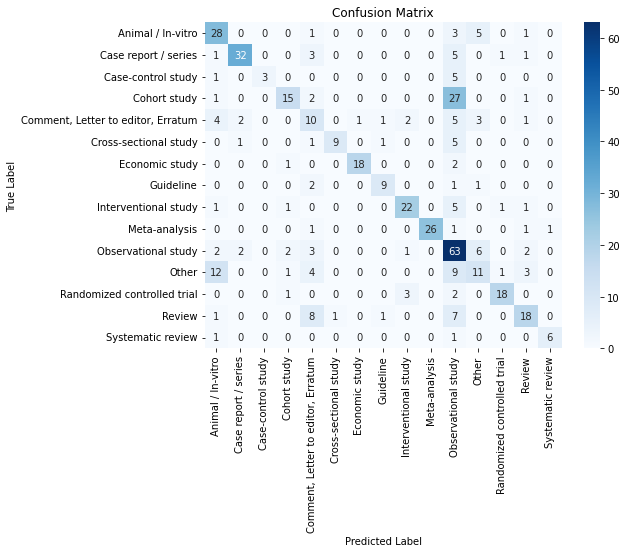

Number of Unique Classes: 15

Classification Report:
                                    precision    recall  f1-score   support

                 Animal / In-vitro       0.54      0.74      0.62        38
              Case report / series       0.86      0.74      0.80        43
                Case-control study       1.00      0.33      0.50         9
                      Cohort study       0.71      0.33      0.45        46
Comment, Letter to editor, Erratum       0.29      0.34      0.31        29
             Cross-sectional study       0.90      0.53      0.67        17
                    Economic study       0.95      0.86      0.90        21
                         Guideline       0.75      0.69      0.72        13
              Interventional study       0.79      0.71      0.75        31
                     Meta-analysis       1.00      0.87      0.93        30
               Observational study       0.45      0.78      0.57        81
                             Other

In [99]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Title'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Study type'], test_size=0.2, random_state=42)

# Step 5: Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print precision, recall, and confusion matrix
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_,
            yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

num_unique_classes = data['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [94]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(classification_report(y_test, y_pred))


Precision: 0.39
Recall: 0.48
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.74      0.59        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                                   Bevacizumab, Chemotherapy       0.67      0.11      0.18        19
                                

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

Accuracy: 96.36%
Precision: 0.97
Recall: 0.96

Confusion Matrix:
[[ 62  17]
 [  0 388]]


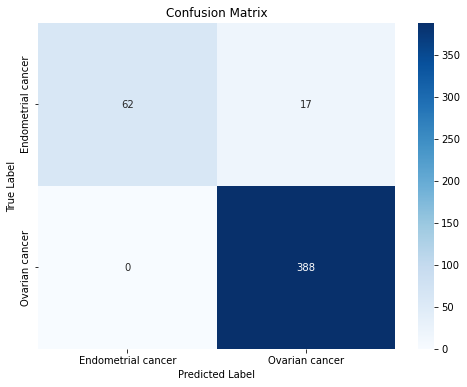

Number of Unique Classes: 2

Classification Report:
                    precision    recall  f1-score   support

Endometrial cancer       1.00      0.78      0.88        79
    Ovarian cancer       0.96      1.00      0.98       388

          accuracy                           0.96       467
         macro avg       0.98      0.89      0.93       467
      weighted avg       0.97      0.96      0.96       467



In [100]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Title'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Disease Name'], test_size=0.2, random_state=42)

# Step 5: Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print precision, recall, and confusion matrix
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_,
            yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

num_unique_classes = data['To Predict: Disease Name'].nunique()
print("Number of Unique Classes:", num_unique_classes)


# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [95]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(classification_report(y_test, y_pred))


Precision: 0.39
Recall: 0.48
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.74      0.59        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                                   Bevacizumab, Chemotherapy       0.67      0.11      0.18        19
                                

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

Accuracy: 48.39%
Precision: 0.39
Recall: 0.48

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


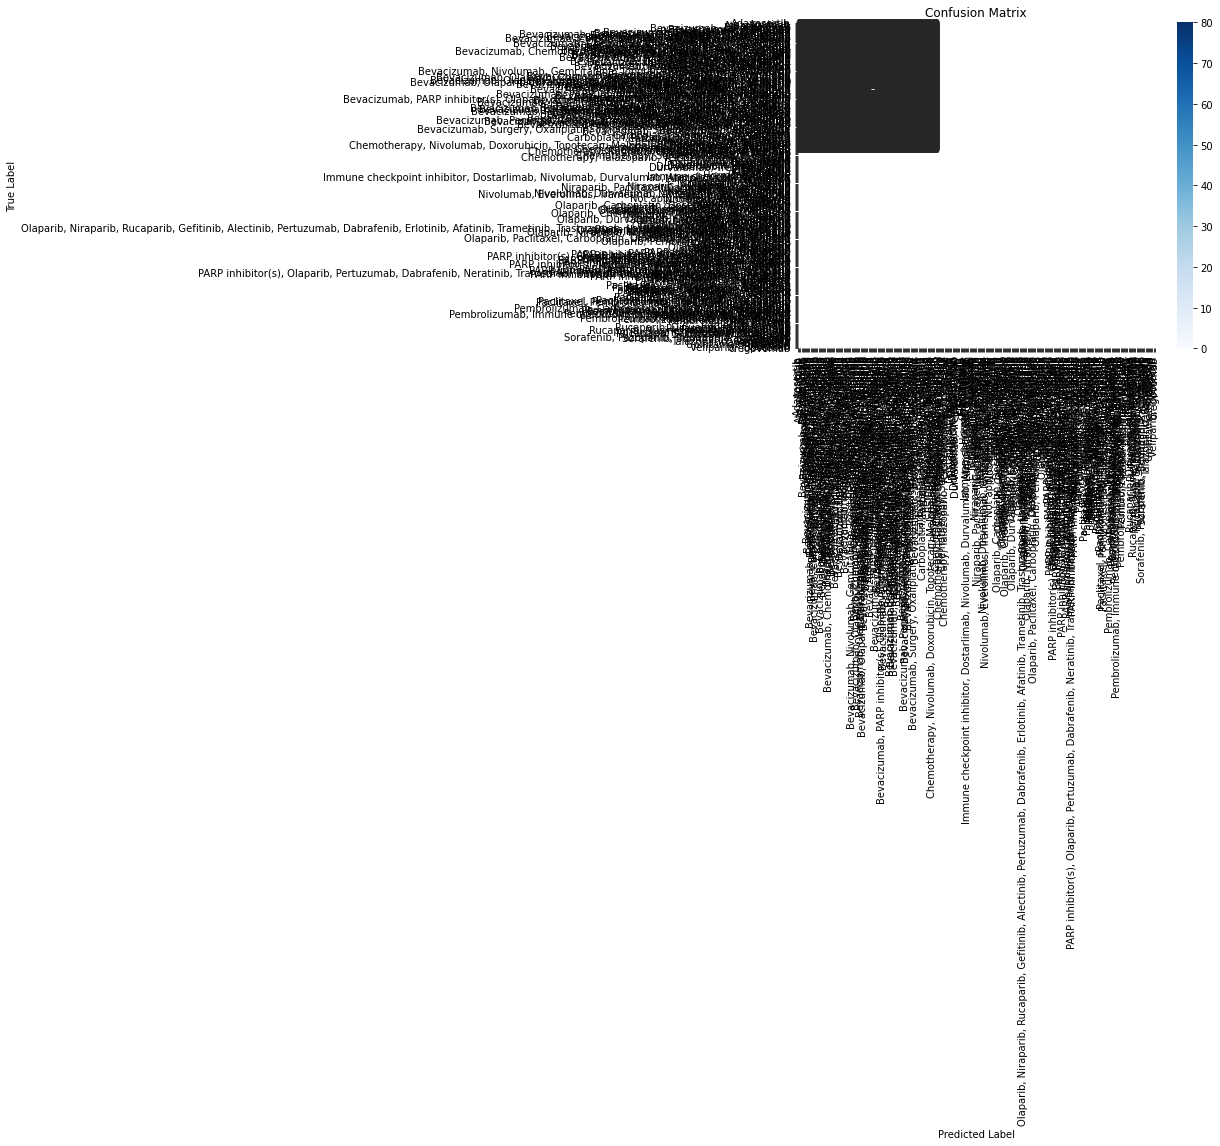

Number of Unique Classes: 363

Classification Report:
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.74      0.59        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                                   Bevacizumab, Chemotherapy       0.67      0.11      0.18        19
       

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334:

In [101]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Title'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Intervention'], test_size=0.2, random_state=42)

# Step 5: Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and confusion matrix
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print precision, recall, and confusion matrix
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_,
            yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

num_unique_classes = data['To Predict: Intervention'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# You can also print a classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [96]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(classification_report(y_test, y_pred))


Precision: 0.39
Recall: 0.48
                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.49      0.74      0.59        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                                   Bevacizumab, Chemotherapy       0.67      0.11      0.18        19
                                

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

In [98]:
#abstarct

In [110]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')
data['Abstract'].fillna('', inplace=True)

# Step 3: Print the number of unique classes in the 'study type' column
num_unique_classes = data['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# Step 4: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Study type'], test_size=0.2, random_state=42)

# Step 6: Train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = decision_tree_classifier.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Number of Unique Classes: 15
Accuracy: 53.96%
Precision: 0.53
Recall: 0.54
Confusion Matrix:
[[23  0  0  0  0  1  0  0  3  0  3  4  1  3  0]
 [ 2 31  1  0  1  0  0  1  1  0  1  4  0  1  0]
 [ 0  1  2  2  0  1  0  0  0  0  3  0  0  0  0]
 [ 2  0  1 14  0  0  1  0  2  1 16  4  2  3  0]
 [ 1  0  0  0 25  0  0  1  1  0  0  1  0  0  0]
 [ 0  0  0  1  1  9  0  0  0  0  4  0  1  1  0]
 [ 2  1  0  0  0  1 15  0  0  0  0  0  2  0  0]
 [ 0  5  0  0  3  0  0  1  0  0  1  2  0  1  0]
 [ 3  0  1  1  2  0  0  0 19  0  3  1  1  0  0]
 [ 0  1  0  1  0  0  0  0  0 22  3  0  1  1  1]
 [ 3  3  3 13  0  2  1  0  5  0 42  7  0  1  1]
 [ 7  2  0  2  4  0  0  2  0  0  8  9  2  5  0]
 [ 0  0  0  1  0  0  0  0  3  0  3  0 17  0  0]
 [ 2  2  0  0  3  0  0  2  1  1  2  0  0 21  2]
 [ 0  1  0  0  0  0  0  0  0  3  1  0  0  1  2]]
                                    precision    recall  f1-score   support

                 Animal / In-vitro       0.51      0.61      0.55        38
              Case report / serie

In [111]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')
data['Abstract'].fillna('', inplace=True)

# Step 3: Print the number of unique classes in the 'study type' column
num_unique_classes = data['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# Step 4: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Disease Name'], test_size=0.2, random_state=42)

# Step 6: Train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = decision_tree_classifier.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Number of Unique Classes: 15
Accuracy: 97.00%
Precision: 0.97
Recall: 0.97
Confusion Matrix:
[[ 69  10]
 [  4 384]]
                    precision    recall  f1-score   support

Endometrial cancer       0.95      0.87      0.91        79
    Ovarian cancer       0.97      0.99      0.98       388

          accuracy                           0.97       467
         macro avg       0.96      0.93      0.94       467
      weighted avg       0.97      0.97      0.97       467



In [79]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')
data['Abstract'].fillna('', inplace=True)

# Step 3: Print the number of unique classes in the 'study type' column
num_unique_classes = data['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# Step 4: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Intervention'], test_size=0.2, random_state=42)

# Step 6: Train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = decision_tree_classifier.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

conf_matrix = confusion_matrix(y_test, y_pred)

dimensions = np.shape(conf_matrix)
rows, columns = dimensions


for i in range(rows):
    print(conf_matrix[i])

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Number of Unique Classes: 15
Accuracy: 31.05%
Precision: 0.33
Recall: 0.31
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334:

In [21]:
#random forest

In [102]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Drop rows with missing values in the 'title' column
data = data.dropna(subset=['Abstract'])

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Study type'], test_size=0.2, random_state=42)

# Step 5: Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = random_forest_classifier.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))

num_unique_classes = data['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 62.71%
                                    precision    recall  f1-score   support

                 Animal / In-vitro       0.60      0.78      0.68        37
              Case report / series       0.90      0.95      0.92        38
                Case-control study       0.00      0.00      0.00         7
                      Cohort study       0.69      0.18      0.29        50
Comment, Letter to editor, Erratum       0.00      0.00      0.00         9
             Cross-sectional study       1.00      0.27      0.43        11
                    Economic study       0.86      0.90      0.88        20
                         Guideline       0.80      0.57      0.67         7
              Interventional study       0.79      0.83      0.81        46
                     Meta-analysis       0.67      0.82      0.74        17
               Observational study       0.46      0.93      0.62        73
                             Other       0.36      0.12      0.18     

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
import numpy as np

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Drop rows with missing values in the 'title' column
data = data.dropna(subset=['Abstract'])

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Disease Name'], test_size=0.2, random_state=42)

# Step 5: Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = random_forest_classifier.predict(X_test)


# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))

num_unique_classes = data['To Predict: Disease Name'].nunique()
print("Number of Unique Classes:", num_unique_classes)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 95.96%
Precision: 0.96
Recall: 0.96
                    precision    recall  f1-score   support

Endometrial cancer       1.00      0.80      0.89        85
    Ovarian cancer       0.95      1.00      0.98       336

          accuracy                           0.96       421
         macro avg       0.98      0.90      0.93       421
      weighted avg       0.96      0.96      0.96       421

Number of Unique Classes: 2

Confusion Matrix:
[[ 68  17]
 [  0 336]]


In [77]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
import numpy as np

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Drop rows with missing values in the 'title' column
data = data.dropna(subset=['Abstract'])

# Step 3: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Intervention'], test_size=0.2, random_state=42)

# Step 5: Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = random_forest_classifier.predict(X_test)


# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))

num_unique_classes = data['To Predict: Intervention'].nunique()
print("Number of Unique Classes:", num_unique_classes)

conf_matrix = confusion_matrix(y_test, y_pred)

dimensions = np.shape(conf_matrix)
rows, columns = dimensions


for i in range(rows):
    print(conf_matrix[i])



D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: R

Accuracy: 42.04%
Precision: 0.32
Recall: 0.42
                                                                    precision    recall  f1-score   support

                                                         Alectinib       0.00      0.00      0.00         1
                                                       Batiraxcept       0.00      0.00      0.00         1
                                                       Bevacizumab       0.34      0.81      0.48        32
                                              Bevacizumab, CRLX101       0.00      0.00      0.00         1
                             Bevacizumab, Carboplatin, Gemcitabine       0.00      0.00      0.00         1
                    Bevacizumab, Carboplatin, Lifastuzumab vedotin       0.00      0.00      0.00         1
                            Bevacizumab, Carboplatin, Mirvetuximab       0.00      0.00      0.00         1
                                         Bevacizumab, Chemotherapy       0.50      0.07  

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [11]:
#svm

In [105]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Handle missing values (NaN) in 'title' column
data['Abstract'].fillna('', inplace=True)

# Step 4: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Study type'], test_size=0.2, random_state=42)

# Step 6: Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

num_unique_classes = data['To Predict: Study type'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Accuracy: 66.17%
Precision: 0.69
Recall: 0.66
Number of Unique Classes: 15
Confusion Matrix:
[[28  0  0  0  0  0  0  0  0  0  1  8  0  1  0]
 [ 1 35  0  1  1  0  0  0  1  0  1  2  0  1  0]
 [ 0  0  2  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0 13  1  0  0  0  2  0 28  0  1  1  0]
 [ 1  0  0  0 25  0  0  1  0  0  1  1  0  0  0]
 [ 0  0  0  0  1  9  0  0  0  0  5  0  1  1  0]
 [ 0  0  0  0  0  0 17  0  0  0  3  0  1  0  0]
 [ 0  0  0  0  3  0  0  5  0  0  0  2  0  2  1]
 [ 0  0  0  1  1  0  0  0 23  0  3  1  1  1  0]
 [ 0  0  0  0  0  0  0  0  0 29  1  0  0  0  0]
 [ 4  1  0  4  0  2  0  0  3  0 59  6  1  1  0]
 [ 7  1  0  0  5  0  0  0  1  0  4 20  0  3  0]
 [ 0  0  0  0  0  0  0  0  5  0  1  2 16  0  0]
 [ 2  0  0  0  4  0  0  0  1  1  0  2  0 26  0]
 [ 0  0  0  1  0  0  0  0  0  2  0  1  0  2  2]]
                                    precision    recall  f1-score   support

                 Animal / In-vitro       0.65      0.74      0.69        38
              Case report / serie

In [106]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Handle missing values (NaN) in 'title' column
data['Abstract'].fillna('', inplace=True)

# Step 4: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Disease Name'], test_size=0.2, random_state=42)

# Step 6: Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

num_unique_classes = data['To Predict: Disease Name'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Accuracy: 95.72%
Precision: 0.96
Recall: 0.96
Number of Unique Classes: 2
Confusion Matrix:
[[ 60  19]
 [  1 387]]
                    precision    recall  f1-score   support

Endometrial cancer       0.98      0.76      0.86        79
    Ovarian cancer       0.95      1.00      0.97       388

          accuracy                           0.96       467
         macro avg       0.97      0.88      0.92       467
      weighted avg       0.96      0.96      0.95       467



In [78]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Step 2: Load and preprocess your dataset from an xlsx file
# Replace 'your_data.xlsx' with your dataset's filename
data = pd.read_excel('Data for ML.xlsx')

# Step 3: Handle missing values (NaN) in 'title' column
data['Abstract'].fillna('', inplace=True)

# Step 4: Vectorize the 'title' text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Abstract'])

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['To Predict: Intervention'], test_size=0.2, random_state=42)

# Step 6: Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = svm_classifier.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

num_unique_classes = data['To Predict: Intervention'].nunique()
print("Number of Unique Classes:", num_unique_classes)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

dimensions = np.shape(conf_matrix)
rows, columns = dimensions


for i in range(rows):
    print(conf_matrix[i])

# You can also print a classification report for more details
print(classification_report(y_test, y_pred))


Accuracy: 41.54%
Precision: 0.33
Recall: 0.42
Number of Unique Classes: 363
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  0 

                                                                                              precision    recall  f1-score   support

                                                                                     AZD9574       0.00      0.00      0.00         1
                                                                                 Adavosertib       0.00      0.00      0.00         1
                                                                                   Alectinib       0.00      0.00      0.00         1
                                                                                 Bevacizumab       0.47      0.70      0.56        43
                                                                   Bevacizumab, Atezolizumab       0.00      0.00      0.00         1
                                                                   Bevacizumab, Chemotherapy       0.50      0.05      0.10        19
                                                     Bevacizu

D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\comding\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: Unde